In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n = 100
data = pd.DataFrame({
    'tenure': np.random.choice(['Tenured', 'Untenured'], size=n, p=[0.6, 0.4]),
    'visible_minority': np.random.choice(['Yes', 'No'], size=n, p=[0.3, 0.7]),
    'age': np.random.normal(loc=45, scale=7, size=n).astype(int),
    'gender': np.random.choice(['Male', 'Female', 'Other'], size=n, p=[0.5, 0.45, 0.05]),
    'evaluation_score': np.round(np.random.normal(loc=4.0, scale=0.5, size=n), 2)
})

# Clip age and evaluation to realistic ranges
data['age'] = data['age'].clip(28, 70)
data['evaluation_score'] = data['evaluation_score'].clip(1.0, 5.0)

# Show head of dataset
print("Sample data:")
print(data.head())

Sample data:
      tenure visible_minority  age  gender  evaluation_score
0    Tenured              Yes   40   Other              4.04
1  Untenured               No   46  Female              3.66
2  Untenured               No   47  Female              4.49
3    Tenured               No   39  Female              3.93
4    Tenured               No   58    Male              3.59


1. Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority? [5]

In [3]:
visible_minority = data[data['visible_minority'] == 'Yes']
visible_minority_tenured = visible_minority[visible_minority['tenure'] == 'Tenured']
percentage_vm_tenured = (len(visible_minority_tenured) / len(visible_minority)) * 100
print(f"\n1. Percentage of visible minorities who are tenured: {percentage_vm_tenured:.2f}%")

# Is tenure status associated with being a visible minority?
contingency_table = pd.crosstab(data['tenure'], data['visible_minority'])
print("\nContingency Table:")
print(contingency_table)


1. Percentage of visible minorities who are tenured: 65.62%

Contingency Table:
visible_minority  No  Yes
tenure                   
Tenured           42   21
Untenured         26   11


2. Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors. [4]

In [4]:
age_stats = data.groupby('tenure')['age'].agg(['mean', 'std'])
print("\n2. Age Statistics by Tenure:")
print(age_stats)



2. Age Statistics by Tenure:
                mean       std
tenure                        
Tenured    45.777778  7.650521
Untenured  44.270270  5.843556


3. Which graph works better and plot that graph for the age variable? [5]

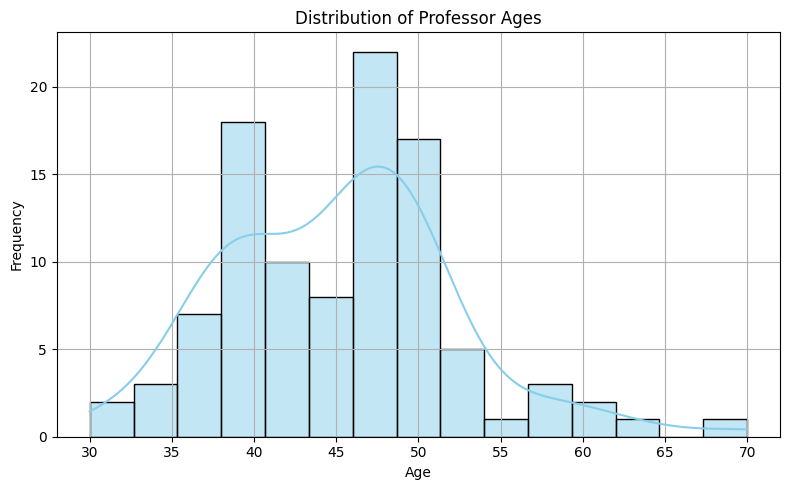

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], kde=True, bins=15, color='skyblue')
plt.title("Distribution of Professor Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

4. Define the difference between pyplot.bar and pyplot.barh. Also plot the graph for gender variable. [4]


4. pyplot.bar() creates vertical bars; pyplot.barh() creates horizontal bars.


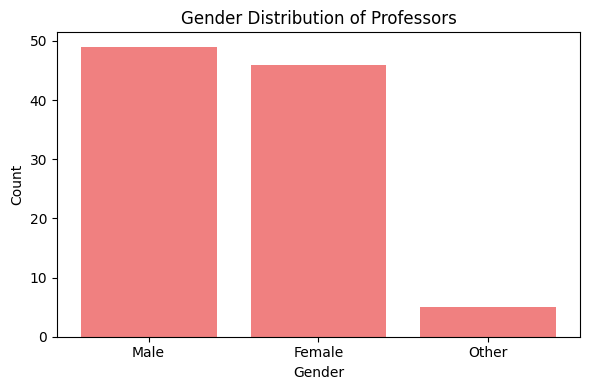

In [5]:
print("\n4. pyplot.bar() creates vertical bars; pyplot.barh() creates horizontal bars.")

# Plot bar chart for gender
gender_counts = data['gender'].value_counts()

# Vertical bar plot
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color='lightcoral')
plt.title("Gender Distribution of Professors")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


5. What is the Median evaluation score for tenured Professors? [2]

In [6]:
median_eval_tenured = data[data['tenure'] == 'Tenured']['evaluation_score'].median()
print(f"\n5. Median evaluation score for tenured professors: {median_eval_tenured}")


5. Median evaluation score for tenured professors: 4.04
